[  4.00000006e-07   4.00000010e-07   4.00000020e-07   4.00000065e-07
   4.00000098e-07   4.00000194e-07   4.00001600e-07   4.00008800e-07]
[  1.04000000e-04   1.06000000e-04   1.12000000e-04   1.39500000e-04
   1.59300000e-04   2.17200000e-04   1.05500000e-01   1.27500000e-01]


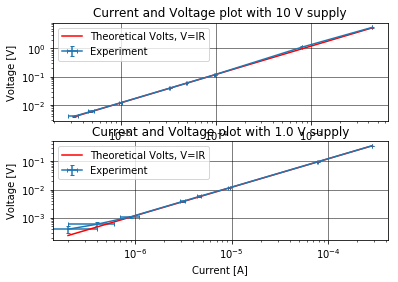

1251.04415015
1209.4859573


In [1]:
import numpy as np
import matplotlib.pyplot as plt


# example data
Current = np.array([3.2, 4.9, 9.9, 32.6, 49.0, 96.8, 800, 4400])*10**(-6)  #minus 6
Voltage = np.array([4.0, 6.0, 12.0, 39.5, 59.3, 117.2, 1100, 5500])*10**(-3) #minus 3

Current2 = np.array([0.2, 0.4, 0.9, 3.1, 4.6, 9.3, 78.0, 288.9])*10**(-6)  #minus 6
Voltage2 = np.array([0.4, 0.6, 1.1, 3.8, 5.7, 11.3, 94.5, 349.5])*10**(-3) #minus 3



# lower & upper limits of the error
ls = 'dotted'


VoltageTheoretical = np.array([3.2*10**(-6)*1203,4400*10**(-6)*1203])
Currentfirstlast = np.array([3.2, 4400])*10**(-6)

VoltageTheoretical2 = np.array([0.2*10**(-6)*1203, 288.9*10**(-6)*1203])
Currentfirstlast2 = np.array([0.2, 288.9])*10**(-6)



# including upper and lower limits
xerr = (Current*0.002+0.4)*10**(-6)
yerr = np.array([4.0*0.001 + 0.1, 6.0*0.001 + 0.1, 12.0*0.001 + 0.1, 39.5*0.001 + 0.1, 59.3*0.001 + 0.1, 117.2*0.001 + 0.1, 1100*0.005 + 100, 5500*0.005 + 100])*10**(-3)


print(xerr)
print(yerr)

xerr2 = (Current*0.002 + 0.2)*10**(-6)
yerr2 = (Voltage*0.001 + 0.1)*10**(-3)


ax = plt.subplot(211)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(color='black', linestyle='-', linewidth=0.5)
plt.errorbar(Current, Voltage, xerr=xerr,yerr=yerr, capsize = 2,label='Experiment')
plt.plot(Currentfirstlast, VoltageTheoretical,color='red',label='Theoretical Volts, V=IR')
plt.legend(loc='upper left')



plt.title('Current and Voltage plot with 10 V supply')
plt.xlabel('Current [A]')
plt.ylabel('Voltage [V]')

ax = plt.subplot(212)
ax.set_yscale('log')
ax.set_xscale('log')
ax.grid(color='black', linestyle='-', linewidth=0.5)
plt.errorbar(Current2, Voltage2, xerr=xerr2,yerr=yerr2, capsize = 2,label='Experiment')
plt.plot(Currentfirstlast2, VoltageTheoretical2,color='red',label='Theoretical Volts, V=IR')
plt.legend(loc='upper left')


plt.title('Current and Voltage plot with 1.0 V supply')
plt.xlabel('Current [A]')
plt.ylabel('Voltage [V]')




"""fit = np.polyfit(Current, Voltage, deg=1)
ax.plot(Current, fit[0] * Current + fit[1], color='red')
ax.scatter(Current, Voltage)
"""

plt.show()



from scipy.optimize import curve_fit

def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x + B

A,B = curve_fit(f, Current, Voltage)[0] # your data x, y to fit
A2,B2 = curve_fit(f, Current2, Voltage2)[0] # your data x, y to fit

print(A)
print(A2)



